# Ternary Plots

https://mpltern.readthedocs.io/en/latest/

`pip install mpltern`

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpltern.datasets import get_triangular_grid

In [2]:
plt.rcParams["figure.figsize"] = (8, 8)

In [3]:
data = [
    (0.219, 0.03, 0.752, 'Point 1'),
    (0.608, 0.114, 0.278, 'Point 2'),
]

descriptions = ['Direktabfluss', 'Grundwasserneubildung', 'Verdunstung']

colors = ['C0', 'C1', 'C2']

ARROW_WIDTH = 0.01
TEXT_OFFSET = 0.03

def ternary_plot(data, descriptions, colors, output='ternary_water.png', grid=False):
    c0, c1, c2 = colors
    top, left, right = descriptions
    format = '{x:.0f} %'
    position = 'tick1'
    
    ax = plt.subplot(projection="ternary", ternary_sum=100.0)

    if grid:
        ax.grid()
    
    ax.taxis.set_tick_params(tick2On=True, colors=c0, grid_color=c0)
    ax.laxis.set_tick_params(tick2On=True, colors=c1, grid_color=c1)
    ax.raxis.set_tick_params(tick2On=True, colors=c2, grid_color=c2)
    
    ax.taxis.set_major_formatter(format)
    ax.laxis.set_major_formatter(format)
    ax.raxis.set_major_formatter(format)
    
    ax.set_tlabel(top)
    ax.set_llabel(left)
    ax.set_rlabel(right)
    
    ax.taxis.set_label_position(position)
    ax.laxis.set_label_position(position)
    ax.raxis.set_label_position(position)
    
    ax.taxis.label.set_color(c0)
    ax.laxis.label.set_color(c1)
    ax.raxis.label.set_color(c2)
    
    for t, l, r, text in data:
        ax.arrow(t, 0, l + r, 0, +l, -l, width=ARROW_WIDTH, length_includes_head=True, color=c0)
        ax.arrow(t + r, l, 0, -r, 0, +r, width=ARROW_WIDTH, length_includes_head=True, color=c1)
        ax.arrow(0, l + t, r, +t, -t, 0, width=ARROW_WIDTH, length_includes_head=True, color=c2)
        ax.scatter(t, l, r, c='k')
        ax.text(t, l + TEXT_OFFSET, r - TEXT_OFFSET, text, ha='right', va='center')
    
    plt.savefig(output)
    plt.show()

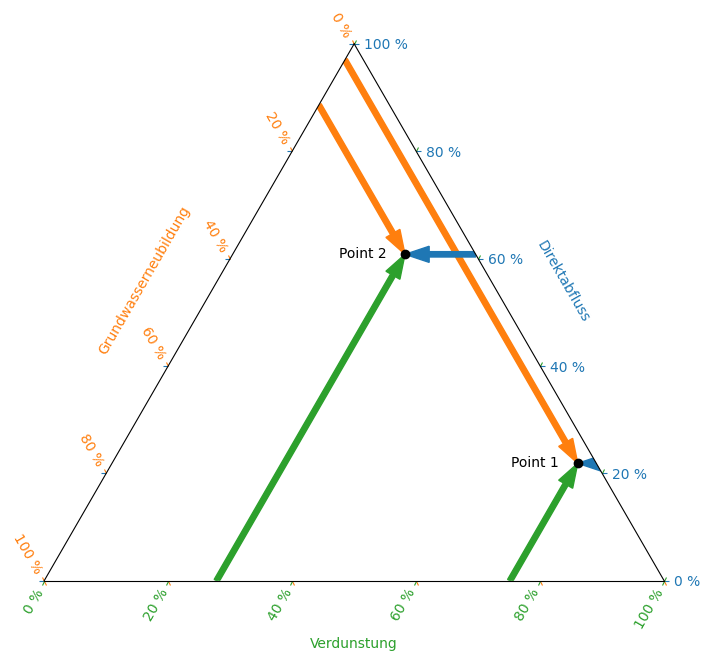

In [4]:
ternary_plot(data, descriptions, colors)

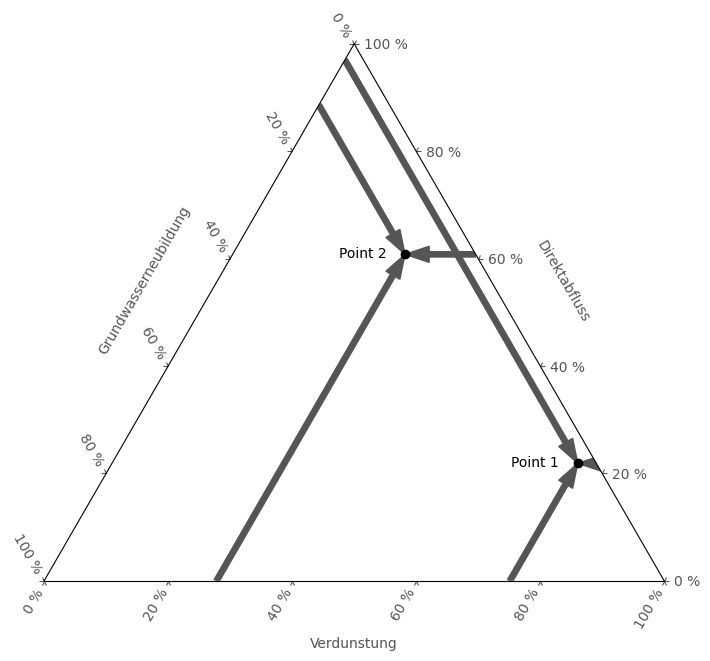

In [5]:
ternary_plot(data, descriptions, ['#555555', '#555555', '#555555'], 'ternary_water_gray.png')

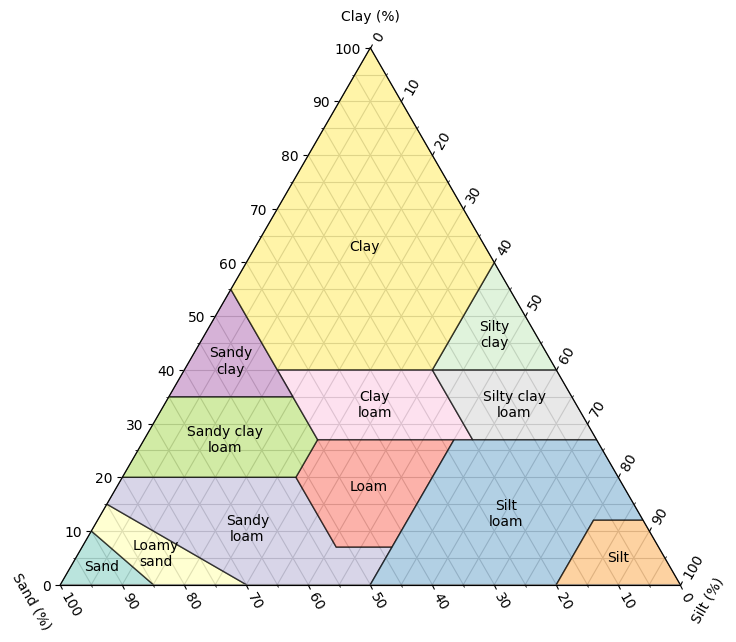

In [6]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib._cm import _Set3_data
from mpltern.datasets import soil_texture_classes


def calculate_centroid(vertices):
    """Calculte the centroid of a polygon.

    https://en.wikipedia.org/wiki/Centroid#Of_a_polygon

    Parameters
    ----------
    vertices : (n, 2) np.ndarray
        Vertices of a polygon.

    Returns
    -------
    centroid : (2, ) np.ndarray
        Centroid of the polygon.
    """
    roll0 = np.roll(vertices, 0, axis=0)
    roll1 = np.roll(vertices, 1, axis=0)
    cross = np.cross(roll0, roll1)
    area = 0.5 * np.sum(cross)
    return np.sum((roll0 + roll1) * cross[:, None], axis=0) / (6.0 * area)


def plot_soil_texture_classes(ax):
    """Plot soil texture classes."""
    classes = soil_texture_classes

    for (key, value), color in zip(classes.items(), _Set3_data):
        tn0, tn1, tn2 = np.array(value).T
        patch = ax.fill(tn0, tn1, tn2, ec="k", fc=color, alpha=0.6, zorder=2.1)
        centroid = calculate_centroid(patch[0].get_xy())

        # last space replaced with line break
        label = key[::-1].replace(" ", "\n", 1)[::-1].capitalize()

        ax.text(
            centroid[0],
            centroid[1],
            label,
            ha="center",
            va="center",
            transform=ax.transData,
        )

    ax.taxis.set_major_locator(MultipleLocator(10.0))
    ax.laxis.set_major_locator(MultipleLocator(10.0))
    ax.raxis.set_major_locator(MultipleLocator(10.0))

    ax.taxis.set_minor_locator(AutoMinorLocator(2))
    ax.laxis.set_minor_locator(AutoMinorLocator(2))
    ax.raxis.set_minor_locator(AutoMinorLocator(2))

    ax.grid(which="both")

    ax.set_tlabel("Clay (%)")
    ax.set_llabel("Sand (%)")
    ax.set_rlabel("Silt (%)")

    ax.taxis.set_ticks_position("tick2")
    ax.laxis.set_ticks_position("tick2")
    ax.raxis.set_ticks_position("tick2")


def main():
    """Main"""
    ax = plt.subplot(projection="ternary", ternary_sum=100.0)
    plot_soil_texture_classes(ax)
    # add plot here on top of USDA soil texture classes with zorder of e.g. 2.5
    plt.savefig('soils.png')
    plt.show()


if __name__ == "__main__":
    main()

## Beispiel für Katja

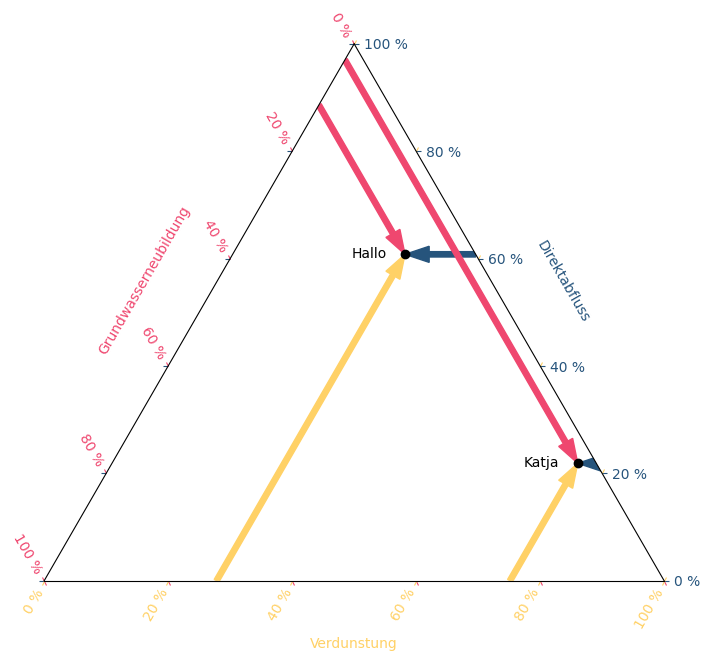

In [7]:
data = [
    (0.608, 0.114, 0.278, 'Hallo'),
    (0.219, 0.03, 0.752, 'Katja'),
]

ternary_plot(data, descriptions, ['#26547c', '#ef476f', '#ffd166'], 'ternary_katja.png')